In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split 
%matplotlib inline

Gaussian Function : $e^{-x^2}$




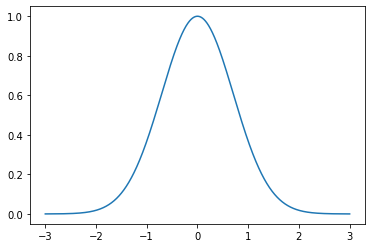

In [43]:
x = np.linspace(-3,3, 2000)
y = np.exp(-1*np.power(x,2))
plt.plot(x,y)
plt.show()

### Lets create a model to fit to this curve using only RELU

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1600,) (400,) (1600,) (400,)


In [46]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2,activation="sigmoid", input_shape=(1,)))
# # # model.add(tf.keras.layers.Dense(2,activation="tanh"))
# model.add(tf.keras.layers.Dense(6,activation="relu", input_shape=(1,)))
# model.add(tf.keras.layers.Dense(6,activation="relu"))
# model.add(tf.keras.layers.Dense(6,activation="relu"))
# # # model.add(tf.keras.layers.Dense(6,activation="relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(loss="mse", optimizer="adam")
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 4         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


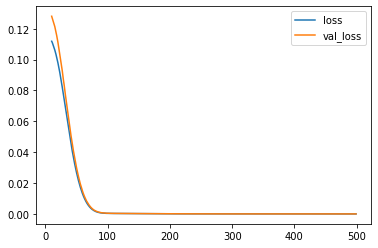

In [47]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=1)
hist = model.fit(x_train,y_train, validation_data=(x_test, y_test), 
                 batch_size=32, epochs=500, verbose=0,
                 callbacks=[cb]) 
df = pd.DataFrame(hist.history)
df[10:].plot()

In [48]:
df.tail(3)

,loss,val_loss
497,0.000013,0.000013
498,0.000014,0.000014
499,0.000013,0.000014


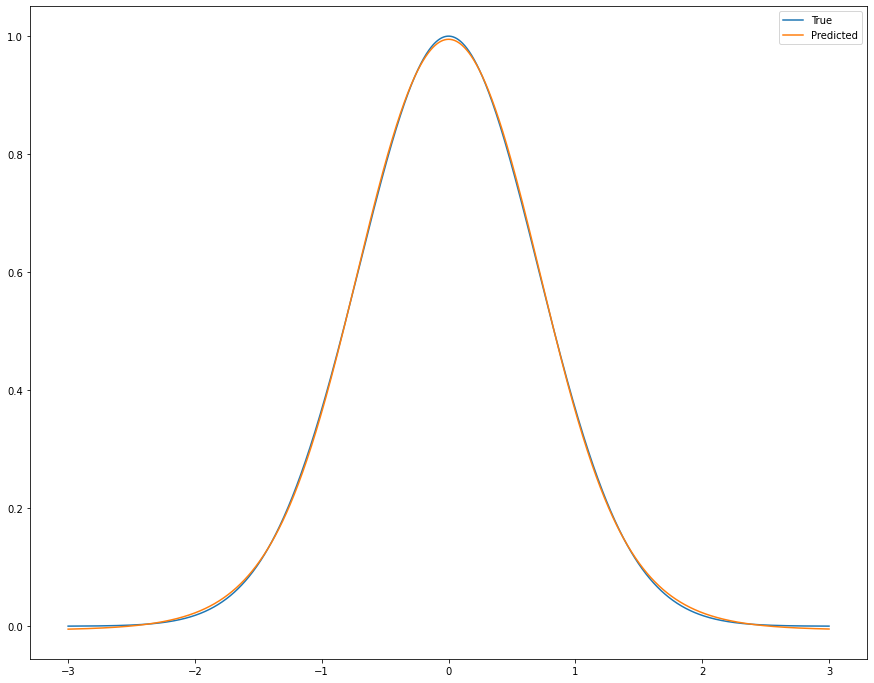

In [49]:
y_pred = model.predict(x)
plt.figure(figsize=(15, 12))
plt.plot(x,y, label="True")
plt.plot(x,y_pred, label="Predicted")
plt.legend()

### Lets try multi output 

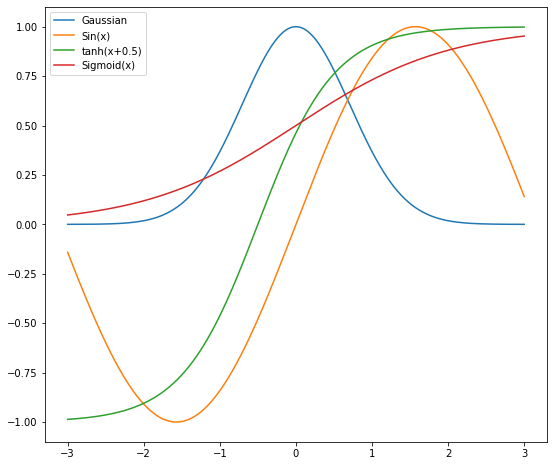

In [20]:
y1 = np.exp(-1*np.power(x,2))  # Gaussian Curve
y2 = np.sin(x)
y3 = np.tanh(x+0.5)
y4 = 1.0/(1.0 + np.exp(-1.0*x)) # Sigmoid
plt.figure(figsize=(9, 8))
plt.plot(x,y1, label="Gaussian")
plt.plot(x,y2, label="Sin(x)")
plt.plot(x,y3, label="tanh(x+0.5)")
plt.plot(x,y4, label="Sigmoid(x)")
plt.legend()

In [21]:
y = np.hstack((y1.reshape((-1,1)), y2.reshape((-1,1)), y3.reshape((-1,1)), y4.reshape((-1,1))))
y.shape

(2000, 4)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1600,) (400,) (1600, 4) (400, 4)


In [38]:

def create_multi_model(units_per_layer=10, activation="relu",
                       num_of_hidden_layers=3,use_batch_norm=False, 
                       dropout=0, out_dim=4):
    tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential()

    for i in range(num_of_hidden_layers+1):
        if i == 0:
            # add input layer
            model.add(tf.keras.layers.Dense(units_per_layer,input_shape=(1,), name="InputLayer"))
        else: 
            model.add(tf.keras.layers.Dense(units_per_layer, name=f"Hidden{i}"))
        if use_batch_norm:
            model.add(tf.keras.layers.BatchNormalization())
        
        model.add(tf.keras.layers.Activation(activation))

        if 0 < dropout < 1.0:
            model.add(tf.keras.layers.Dropout(dropout))
    
    # Now add output layer
    model.add(tf.keras.layers.Dense(out_dim, name="OutputLayer"))
 
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

multi_model = create_multi_model(units_per_layer=5, activation="sigmoid", num_of_hidden_layers=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (Dense)           (None, 5)                 10        
_________________________________________________________________
activation (Activation)      (None, 5)                 0         
_________________________________________________________________
OutputLayer (Dense)          (None, 4)                 24        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


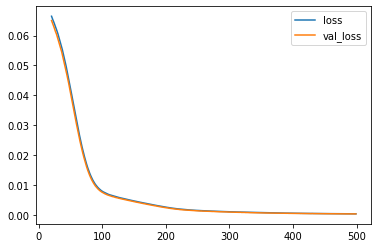

In [39]:
cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)
hist = multi_model.fit(x_train,y_train, validation_data=(x_test, y_test), 
                 batch_size=32, epochs=500, verbose=0, callbacks=[cb]) 
df = pd.DataFrame(hist.history)
df[20:].plot()

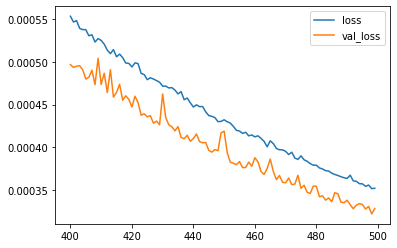

In [40]:
df[-100:].plot()

In [41]:
df.tail(3)

,loss,val_loss
497,0.000356,0.000331
498,0.000352,0.000322
499,0.000352,0.000328


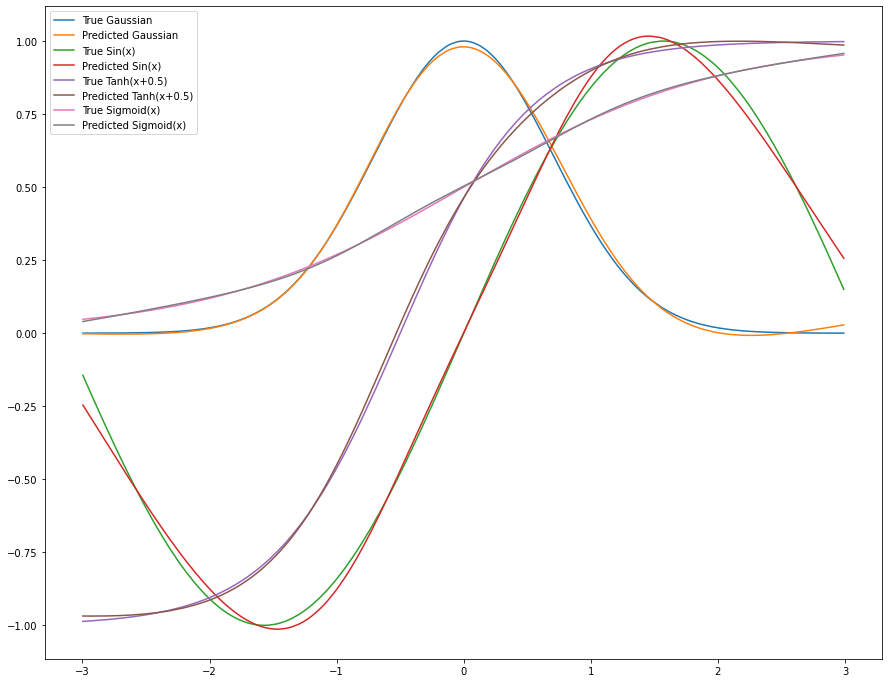

In [42]:
x_test_sorted_pos = np.argsort(x_test)
x_disp = x_test[x_test_sorted_pos]
y_disp = y_test[x_test_sorted_pos]
y_pred = multi_model.predict(x_disp)
plt.figure(figsize=(15, 12))
plt.plot(x_disp,y_disp[:,0], label="True Gaussian")
plt.plot(x_disp,y_pred[:,0], label="Predicted Gaussian")
plt.plot(x_disp,y_disp[:,1], label="True Sin(x)")
plt.plot(x_disp,y_pred[:,1], label="Predicted Sin(x)")
plt.plot(x_disp,y_disp[:,2], label="True Tanh(x+0.5)")
plt.plot(x_disp,y_pred[:,2], label="Predicted Tanh(x+0.5)")
plt.plot(x_disp,y_disp[:,3], label="True Sigmoid(x)")
plt.plot(x_disp,y_pred[:,3], label="Predicted Sigmoid(x)")
plt.legend()

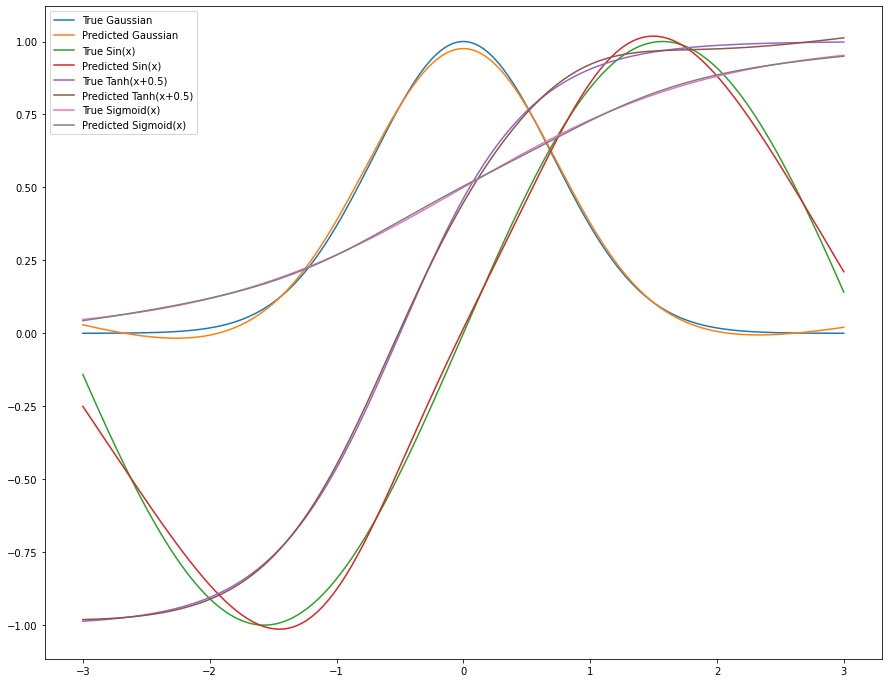

In [28]:
y_pred = multi_model.predict(x)
plt.figure(figsize=(15, 12))
plt.plot(x,y[:,0], label="True Gaussian")
plt.plot(x,y_pred[:,0], label="Predicted Gaussian")
plt.plot(x,y[:,1], label="True Sin(x)")
plt.plot(x,y_pred[:,1], label="Predicted Sin(x)")
plt.plot(x,y[:,2], label="True Tanh(x+0.5)")
plt.plot(x,y_pred[:,2], label="Predicted Tanh(x+0.5)")
plt.plot(x,y[:,3], label="True Sigmoid(x)")
plt.plot(x,y_pred[:,3], label="Predicted Sigmoid(x)")
plt.legend()